# Datenerkundung & Preprocessing

In [122]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
from IPython.display import HTML
from sklearn.feature_selection import VarianceThreshold

In [123]:
# auto reload local helpers
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
# our helpers module
import local_helpers as lh

In [125]:
# Update pyplot defaults
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 15),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

# CSV einlesen und Preprocessing #

In [126]:
filename = "../datasets/survery_data_annonymized_230626.csv"
data = pd.read_csv(filename)
data.head()

,Timestamp,Alter,Geschlecht,"Bitte gib hier ein Pseudonym ein und merke dir dieses (z.B. Kürzel, Zahlencode, etc.). Damit können nach Abschluss des Projektes der eigene ""Datenpunkt"" gefunden werden. Das Pseudonym wird für Andere sichtbar sein.",Welcher Funktion an der HSD fühlst du dich am meisten zugehörig?,Welchem Studiengang fühlst du dich am meisten zugehörig?,Als wie sportlich würdest du dich einschätzen?,Welche Sportarten interessieren dich am meisten (wähle maximal 5)?,Was ist deine absolute Lieblingssportart?,Welche Rolle spielt für dich gesunde Ernährung?,...,Strebst du nach dem Studium auch weiterhin eine akademische Laufbahn an?,Wie gern lernst Du in der Gruppe?,"Prokrastinierst du, wenn du lernen müsstest?",Wie häufig machst du Abgaben auf den letzten Drücker?,Wie gerne probierst du neue Lebensmittel aus?,Wie häufig verbringst du Zeit in der Natur (z. B. beim Wandern oder Camping)?,Wie häufig verreist du?,Wie interessiert bist du an handwerklichen Tätigkeiten?,Wie gerne magst du Sprachnachrichten?,Wie wichtig ist es dir viel Geld zu verdienen?
0,2023/05/25 9:05:15 AM GMT+3,28,männlich,lalala-lololo,Student*in,MMI,4,Basketball;Yoga;Bouldern/Klettern;Rennrad/Moun...,Joggen,4,...,1,5,3,2,5,5,2,2,3,3
1,2023/05/25 9:21:27 AM GMT+3,26,männlich,hbstr,Student*in,MMI,3,Fußball;Volleyball;Yoga;Bouldern/Klettern;Renn...,Fußball,4,...,3,3,2,2,4,3,3,4,3,4
2,2023/05/25 10:10:57 AM GMT+3,24,männlich,Panda,Student*in,MMI,2,Fußball;Handball;Yoga;Tanzen;Bouldern/Klettern,-,5,...,3,5,5,1,3,2,3,2,4,3
3,2023/05/30 11:25:32 PM GMT+3,23,männlich,TomTom Navigation,Student*in,MMI,5,Leichtathletik;Bouldern/Klettern;Wintersport,Trampolin,2,...,2,2,2,3,5,4,4,2,3,3
4,2023/05/31 11:17:51 AM GMT+3,24,weiblich,LcAbrgr,Student*in,MMI,3,Bouldern/Klettern,Klettern,4,...,1,1,5,5,2,3,4,3,3,4


## Preprocessing ##

### Timestamp entfernen ###

In [127]:
data.drop("Timestamp", axis=1, inplace=True)

### Pseudonym und Id seperat speichern und entfernen ###

In [128]:
pseudonym_df = data["Bitte gib hier ein Pseudonym ein und merke dir dieses (z.B. Kürzel, Zahlencode, etc.). Damit können nach Abschluss des Projektes der eigene \"Datenpunkt\" gefunden werden. Das Pseudonym wird für Andere sichtbar sein."]

data.drop("Bitte gib hier ein Pseudonym ein und merke dir dieses (z.B. Kürzel, Zahlencode, etc.). Damit können nach Abschluss des Projektes der eigene \"Datenpunkt\" gefunden werden. Das Pseudonym wird für Andere sichtbar sein.", axis=1, inplace=True)

%store pseudonym_df

Stored 'pseudonym_df' (Series)


### Einen Zeilenumbruch nach 50 Zeichen einfügen, um lange Titel besser darzustellen ###

In [129]:
data.rename(columns=lambda title: lh.insert_linebreaks(title), inplace=True)
data.head()

,Alter,Geschlecht,Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?,Welchem Studiengang fühlst du dich am meisten zugehörig?,Als wie sportlich würdest du dich einschätzen?,Welche Sportarten interessieren dich am meisten (wähle\nmaximal 5)?,Was ist deine absolute Lieblingssportart?,Welche Rolle spielt für dich gesunde Ernährung?,Wie gerne gehst du Essen oder Trinken?,Wie gerne kochst du selbst?,...,Strebst du nach dem Studium auch weiterhin eine akademische\nLaufbahn an?,Wie gern lernst Du in der Gruppe?,"Prokrastinierst du, wenn du lernen müsstest?",Wie häufig machst du Abgaben auf den letzten Drücker?,Wie gerne probierst du neue Lebensmittel aus?,Wie häufig verbringst du Zeit in der Natur (z. B. beim\nWandern oder Camping)?,Wie häufig verreist du?,Wie interessiert bist du an handwerklichen Tätigkeiten?,Wie gerne magst du Sprachnachrichten?,Wie wichtig ist es dir viel Geld zu verdienen?
0,28,männlich,Student*in,MMI,4,Basketball;Yoga;Bouldern/Klettern;Rennrad/Moun...,Joggen,4,3,4,...,1,5,3,2,5,5,2,2,3,3
1,26,männlich,Student*in,MMI,3,Fußball;Volleyball;Yoga;Bouldern/Klettern;Renn...,Fußball,4,4,5,...,3,3,2,2,4,3,3,4,3,4
2,24,männlich,Student*in,MMI,2,Fußball;Handball;Yoga;Tanzen;Bouldern/Klettern,-,5,4,4,...,3,5,5,1,3,2,3,2,4,3
3,23,männlich,Student*in,MMI,5,Leichtathletik;Bouldern/Klettern;Wintersport,Trampolin,2,4,4,...,2,2,2,3,5,4,4,2,3,3
4,24,weiblich,Student*in,MMI,3,Bouldern/Klettern,Klettern,4,3,2,...,1,1,5,5,2,3,4,3,3,4


### Whitespace, Emojis und Co. entfernen ###

In [130]:
# remove all unnessecary whitespace and emojis from the data
data = data.applymap(lambda x: lh.remove_emojis_and_whitespace(x) if isinstance(x, str) else x)

data["Was ist dein Lieblingsessen? (nur eines angeben)"].value_counts()

Pizza                                       6
Burger                                      5
Döner                                       4
Lasagne                                     4
Pasta                                       3
Sushi                                       3
Pfannkuchen                                 3
Nudeln                                      2
Humus                                       1
Tortelini                                   1
Yaprak                                      1
Lachs mit Bratkartoffeln und Gurkensalat    1
Ramen                                       1
Vegane Lasagne                              1
Cordon bleu                                 1
Reispfanne mit viel Gemüse                  1
Gemüsepfanne mit Reis                       1
Carbonara                                   1
Ofenkartoffeln mit Gemüse                   1
Pommes                                      1
Nudeln mit Pilzen in Sahnesauce             1
Hamburger                         

### One Hot Encoding für "Welche Sportarten interessieren dich am meisten?" (Multiselect) ###

--> Für jede Sportart ein neues Feature erstellen (ja/nein), damit man diese besser auswerten kann

In [131]:
sports_column_name = "Welche Sportarten interessieren dich am meisten (wähle\nmaximal 5)?"

encoded_columns = data[sports_column_name].str.get_dummies(sep=";")
short_column_labels_sportarten = encoded_columns.columns.map(lambda x: f"sportarten_{x}")
encoded_columns.columns = encoded_columns.columns.map(lambda x: f"Interesse an {x}? (encoded)")

data = data.join(encoded_columns)
data = data.drop(sports_column_name, axis=1)
data.head()

,Alter,Geschlecht,Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?,Welchem Studiengang fühlst du dich am meisten zugehörig?,Als wie sportlich würdest du dich einschätzen?,Was ist deine absolute Lieblingssportart?,Welche Rolle spielt für dich gesunde Ernährung?,Wie gerne gehst du Essen oder Trinken?,Wie gerne kochst du selbst?,Wie gerne gehst du feiern?,...,Interesse an Leichtathletik? (encoded),Interesse an Reiten? (encoded),Interesse an Rennrad/Mountainbike? (encoded),Interesse an Schwimmen? (encoded),Interesse an Tanzen? (encoded),Interesse an Tennis? (encoded),Interesse an Volleyball? (encoded),Interesse an Wassersport? (encoded),Interesse an Wintersport? (encoded),Interesse an Yoga? (encoded)
0,28,männlich,Student*in,MMI,4,Joggen,4,3,4,3,...,0,0,1,0,0,0,0,0,0,1
1,26,männlich,Student*in,MMI,3,Fußball,4,4,5,2,...,0,0,1,0,0,0,1,0,0,1
2,24,männlich,Student*in,MMI,2,-,5,4,4,3,...,0,0,0,0,1,0,0,0,0,1
3,23,männlich,Student*in,MMI,5,Trampolin,2,4,4,2,...,1,0,0,0,0,0,0,0,1,0
4,24,weiblich,Student*in,MMI,3,Klettern,4,3,2,1,...,0,0,0,0,0,0,0,0,0,0


## Kürzere Label für die Spalten ##

In [132]:
short_labels = ["alter", "geschlecht", "funktion", "studiengang", "sportlichkeit", "lieblingssportart",
          "ernaehrung", "essengehen", "kochen", "feiern", "lieblingsessen", "musik", "lieblingsmusiker", "lesen", "schauspiel",
          "filme", "malen", "museumsbesuche", "videospiele", "social_media", "technologie", "astronomie", "naturwissenschaften",
          "freiwilligenarbeit", "soziales", "introvertiert", "fomo", "spontan", "verwirrt", "gluecklich", "geduldig", "streitlustig",
          "abenteuerlustig", "studienzweifel", "studium_zufriedenheit", "akademische_laufbahn", "lerngruppe", "prokrastinieren",
          "letzter_druecker", "neue_lebensmittel", "natur", "reisen", "handwerk", "sprachnachrichten", "geld",]
short_labels = short_labels + list(short_column_labels_sportarten)

# Create a dictionary with short labels as keys and full questions as values
short_labels_and_full_questions = dict(zip(short_labels, data.columns))

# Convert to series
columns = pd.Series(short_labels_and_full_questions)

# Erste Beobachtungen zu den Daten #

In [133]:
data.describe()

,Alter,Als wie sportlich würdest du dich einschätzen?,Welche Rolle spielt für dich gesunde Ernährung?,Wie gerne gehst du Essen oder Trinken?,Wie gerne kochst du selbst?,Wie gerne gehst du feiern?,Wie sehr interessierst du dich für Musik?,Wie gerne liest Du?,"Wie sehr interessierst du dich für darstellende Künste\nwie Schauspiel, Tanz oder Gesang?","Wie sehr interessierst du sich für Filme, Kino, Fernsehsendungen?",...,Interesse an Leichtathletik? (encoded),Interesse an Reiten? (encoded),Interesse an Rennrad/Mountainbike? (encoded),Interesse an Schwimmen? (encoded),Interesse an Tanzen? (encoded),Interesse an Tennis? (encoded),Interesse an Volleyball? (encoded),Interesse an Wassersport? (encoded),Interesse an Wintersport? (encoded),Interesse an Yoga? (encoded)
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,25.532258,3.290323,3.548387,3.854839,3.822581,2.822581,4.000000,3.112903,2.629032,3.741935,...,0.112903,0.032258,0.209677,0.354839,0.241935,0.129032,0.274194,0.064516,0.080645,0.209677
std,4.482087,0.981586,0.823376,0.989233,0.983873,1.166811,0.940875,1.229485,1.190590,0.904189,...,0.319058,0.178127,0.410402,0.482370,0.431751,0.337972,0.449749,0.247676,0.274512,0.410402
min,18.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,42.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


--> "Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in? (nur eine/n angeben)" hat 7 fehlende Einträge \
--> "Was ist dein Lieblingsessen? (nur eines angeben)" hat 4 fehlende Einträge

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 62 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                      --------------  ----- 
 0   Alter                                                                                                                       62 non-null     int64 
 1   Geschlecht                                                                                                                  62 non-null     object
 2   Welcher Funktion an der HSD fühlst du dich am meisten
zugehörig?                                                            62 non-null     object
 3   Welchem Studiengang fühlst du dich am meisten zugehörig?                                                                    62 non-n

In [135]:
df_columns_have_nan_values = pd.DataFrame(zip(short_labels, data.isna().any().values), columns=["short_label", "has_nan"])
columns_with_nan_values = df_columns_have_nan_values[df_columns_have_nan_values.has_nan == True]
columns_with_nan_values

,short_label,has_nan
10,lieblingsessen,True
12,lieblingsmusiker,True


In [136]:
columns_with_nan_values_original = [columns[x] for x in list(columns_with_nan_values["short_label"])]
data[columns_with_nan_values_original].isna().sum()

Was ist dein Lieblingsessen? (nur eines angeben)                                       4
Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)    7
dtype: int64

## TODO: Hier schon NaN-Handling? ##

# Daten visualisieren #

## Demographische Daten ##

<Axes: title={'center': 'Welchem Studiengang fühlst du dich am meisten zugehörig?'}>

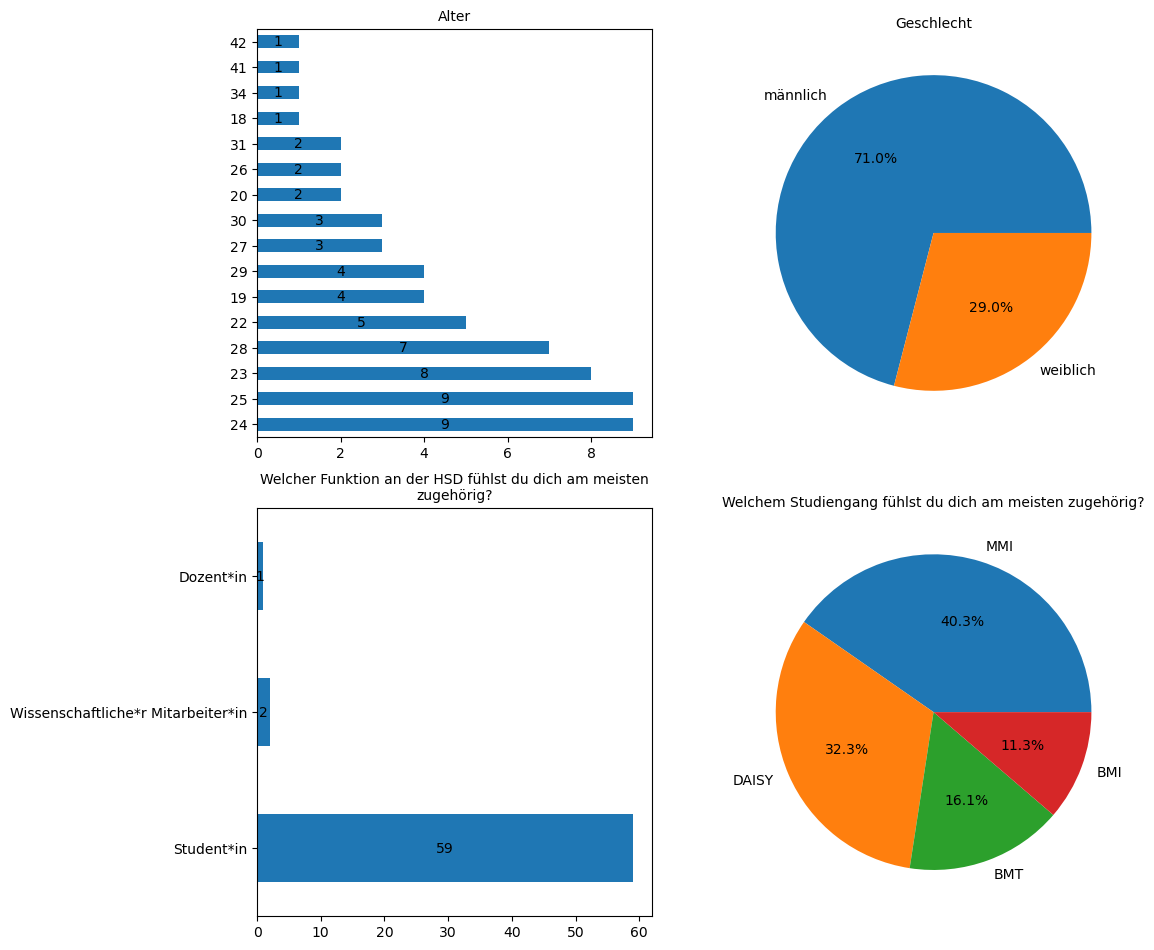

In [137]:
# Plot a chart with 4 subplots showing the distribution of the demographic data
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=3)

alter = data.value_counts(columns.alter).plot.barh(ax=axes[0, 0], title=columns.alter, ylabel="")
alter.bar_label(alter.containers[0], fmt='%.0f', label_type='center')

data.value_counts(columns.geschlecht).plot.pie(ax=axes[0, 1], title=columns.geschlecht, ylabel="", autopct='%1.1f%%')

funktion = data.value_counts(columns.funktion).plot.barh(ax=axes[1, 0], title=columns.funktion, ylabel="")
funktion.bar_label(funktion.containers[0], fmt='%.0f', label_type='center')

data.value_counts(columns.studiengang).plot.pie(ax=axes[1, 1], title=columns.studiengang, ylabel="", autopct='%1.1f%%')

## Fragen ##

### Sportarten (jeweils die Anzahl der Menschen, die diese im Multiselect ausgewählt haben (0) oder nicht (1)) ###

[Text(0, 0, '49'), Text(0, 0, '13')]

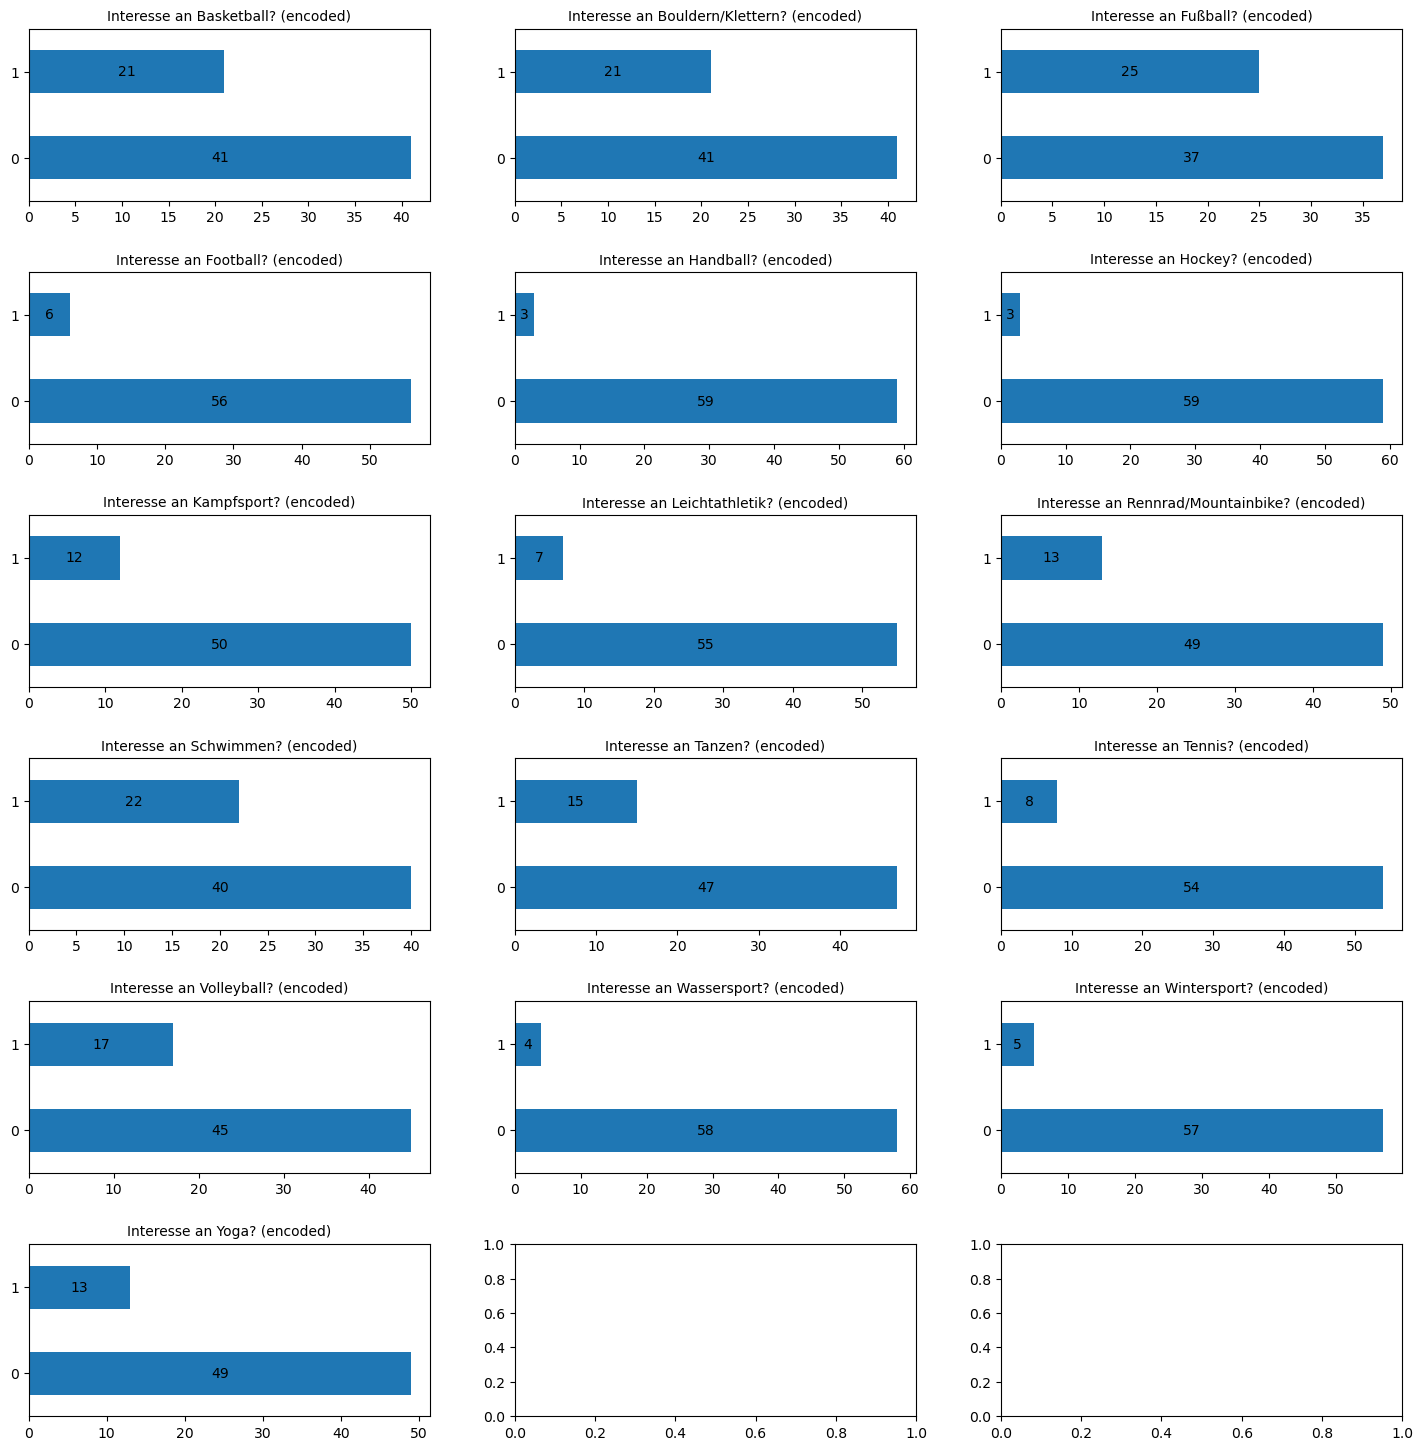

In [138]:
fig, axes = plt.subplots(6, 3, figsize=(15, 15))
fig.tight_layout(pad=3)

basketball = data.value_counts(columns.sportarten_Basketball).plot.barh(ax=axes[0, 0], title=columns.sportarten_Basketball, ylabel="")
basketball.bar_label(basketball.containers[0], fmt='%.0f', label_type='center')

bouldern_klettern = data.value_counts(columns["sportarten_Bouldern/Klettern"]).plot.barh(ax=axes[0, 1], title=columns["sportarten_Bouldern/Klettern"], ylabel="")
bouldern_klettern.bar_label(bouldern_klettern.containers[0], fmt='%.0f', label_type='center')

fussball = data.value_counts(columns.sportarten_Fußball).plot.barh(ax=axes[0, 2], title=columns.sportarten_Fußball, ylabel="")
fussball.bar_label(fussball.containers[0], fmt='%.0f', label_type='center')

football = data.value_counts(columns.sportarten_Football).plot.barh(ax=axes[1, 0], title=columns.sportarten_Football, ylabel="")
football.bar_label(football.containers[0], fmt='%.0f', label_type='center')

handball = data.value_counts(columns.sportarten_Handball).plot.barh(ax=axes[1, 1], title=columns.sportarten_Handball, ylabel="")
handball.bar_label(handball.containers[0], fmt='%.0f', label_type='center')

hockey = data.value_counts(columns.sportarten_Hockey).plot.barh(ax=axes[1, 2], title=columns.sportarten_Hockey, ylabel="")
hockey.bar_label(hockey.containers[0], fmt='%.0f', label_type='center')

kampfsport = data.value_counts(columns.sportarten_Kampfsport).plot.barh(ax=axes[2, 0], title=columns.sportarten_Kampfsport, ylabel="")
kampfsport.bar_label(kampfsport.containers[0], fmt='%.0f', label_type='center')

leichtathletik = data.value_counts(columns.sportarten_Leichtathletik).plot.barh(ax=axes[2, 1], title=columns.sportarten_Leichtathletik, ylabel="")
leichtathletik.bar_label(leichtathletik.containers[0], fmt='%.0f', label_type='center')

rennrad_mountainbike = data.value_counts(columns["sportarten_Rennrad/Mountainbike"]).plot.barh(ax=axes[2, 2], title=columns["sportarten_Rennrad/Mountainbike"], ylabel="")
rennrad_mountainbike.bar_label(rennrad_mountainbike.containers[0], fmt='%.0f', label_type='center')

schwimmen = data.value_counts(columns.sportarten_Schwimmen).plot.barh(ax=axes[3, 0], title=columns.sportarten_Schwimmen, ylabel="")
schwimmen.bar_label(schwimmen.containers[0], fmt='%.0f', label_type='center')

tanzen = data.value_counts(columns.sportarten_Tanzen).plot.barh(ax=axes[3, 1], title=columns.sportarten_Tanzen, ylabel="")
tanzen.bar_label(tanzen.containers[0], fmt='%.0f', label_type='center')

tennis = data.value_counts(columns.sportarten_Tennis).plot.barh(ax=axes[3, 2], title=columns.sportarten_Tennis, ylabel="")
tennis.bar_label(tennis.containers[0], fmt='%.0f', label_type='center')

volleyball = data.value_counts(columns.sportarten_Volleyball).plot.barh(ax=axes[4, 0], title=columns.sportarten_Volleyball, ylabel="")
volleyball.bar_label(volleyball.containers[0], fmt='%.0f', label_type='center')

wassersport = data.value_counts(columns.sportarten_Wassersport).plot.barh(ax=axes[4, 1], title=columns.sportarten_Wassersport, ylabel="")
wassersport.bar_label(wassersport.containers[0], fmt='%.0f', label_type='center')

wintersport = data.value_counts(columns.sportarten_Wintersport).plot.barh(ax=axes[4, 2], title=columns.sportarten_Wintersport, ylabel="")
wintersport.bar_label(wintersport.containers[0], fmt='%.0f', label_type='center')

yoga = data.value_counts(columns.sportarten_Yoga).plot.barh(ax=axes[5, 0], title=columns.sportarten_Yoga, ylabel="")
yoga.bar_label(yoga.containers[0], fmt='%.0f', label_type='center')

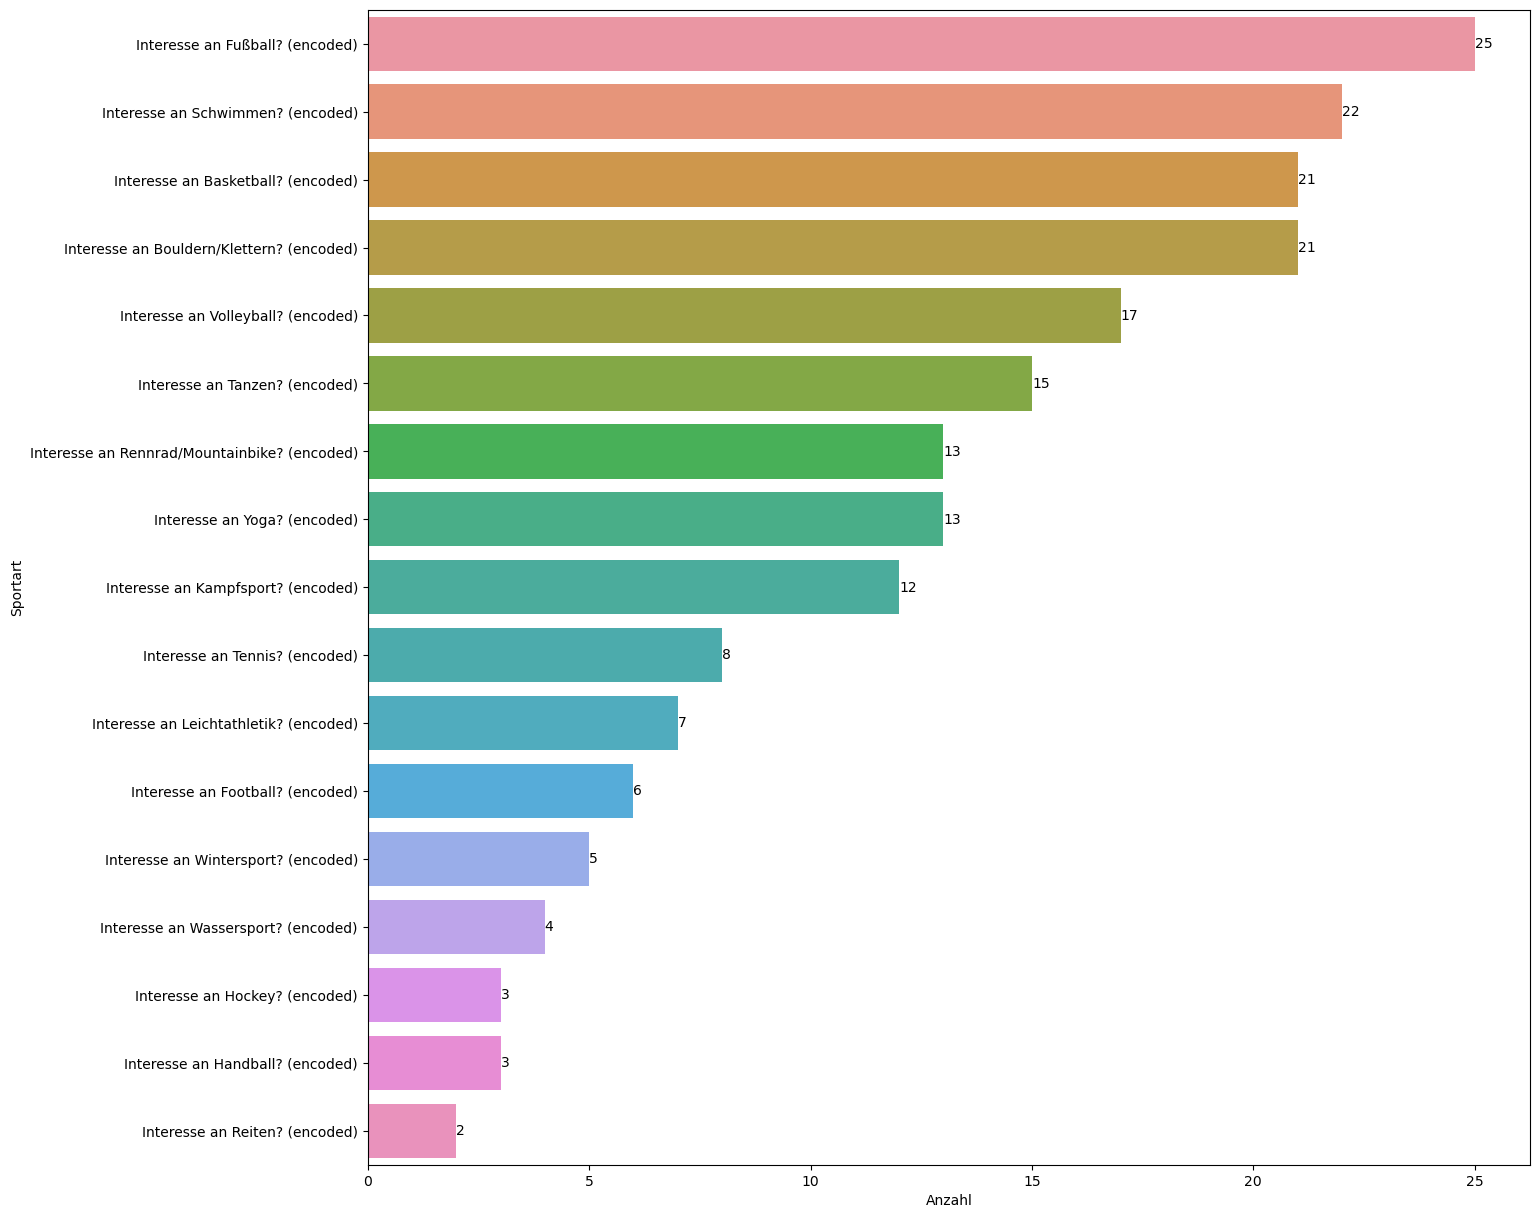

In [139]:
# Get all column names related to "Sportarten"
columns_sportarten = columns[columns.str.startswith('Interesse an')].values

# Create new DataFrame that stores the amount of votes for each "Sportart"
df_filtered_sportarten= pd.DataFrame(zip(columns_sportarten, data[columns_sportarten].sum()), columns=["Sportart", "Anzahl"])
df_filtered_sportarten = df_filtered_sportarten.sort_values(by="Anzahl", ascending=False)

ax = sb.barplot(x='Anzahl', y='Sportart', data=df_filtered_sportarten)

for i in ax.containers:
    ax.bar_label(i,)

### Fragen mit Ordinalskala (1-5 Fragen) ###

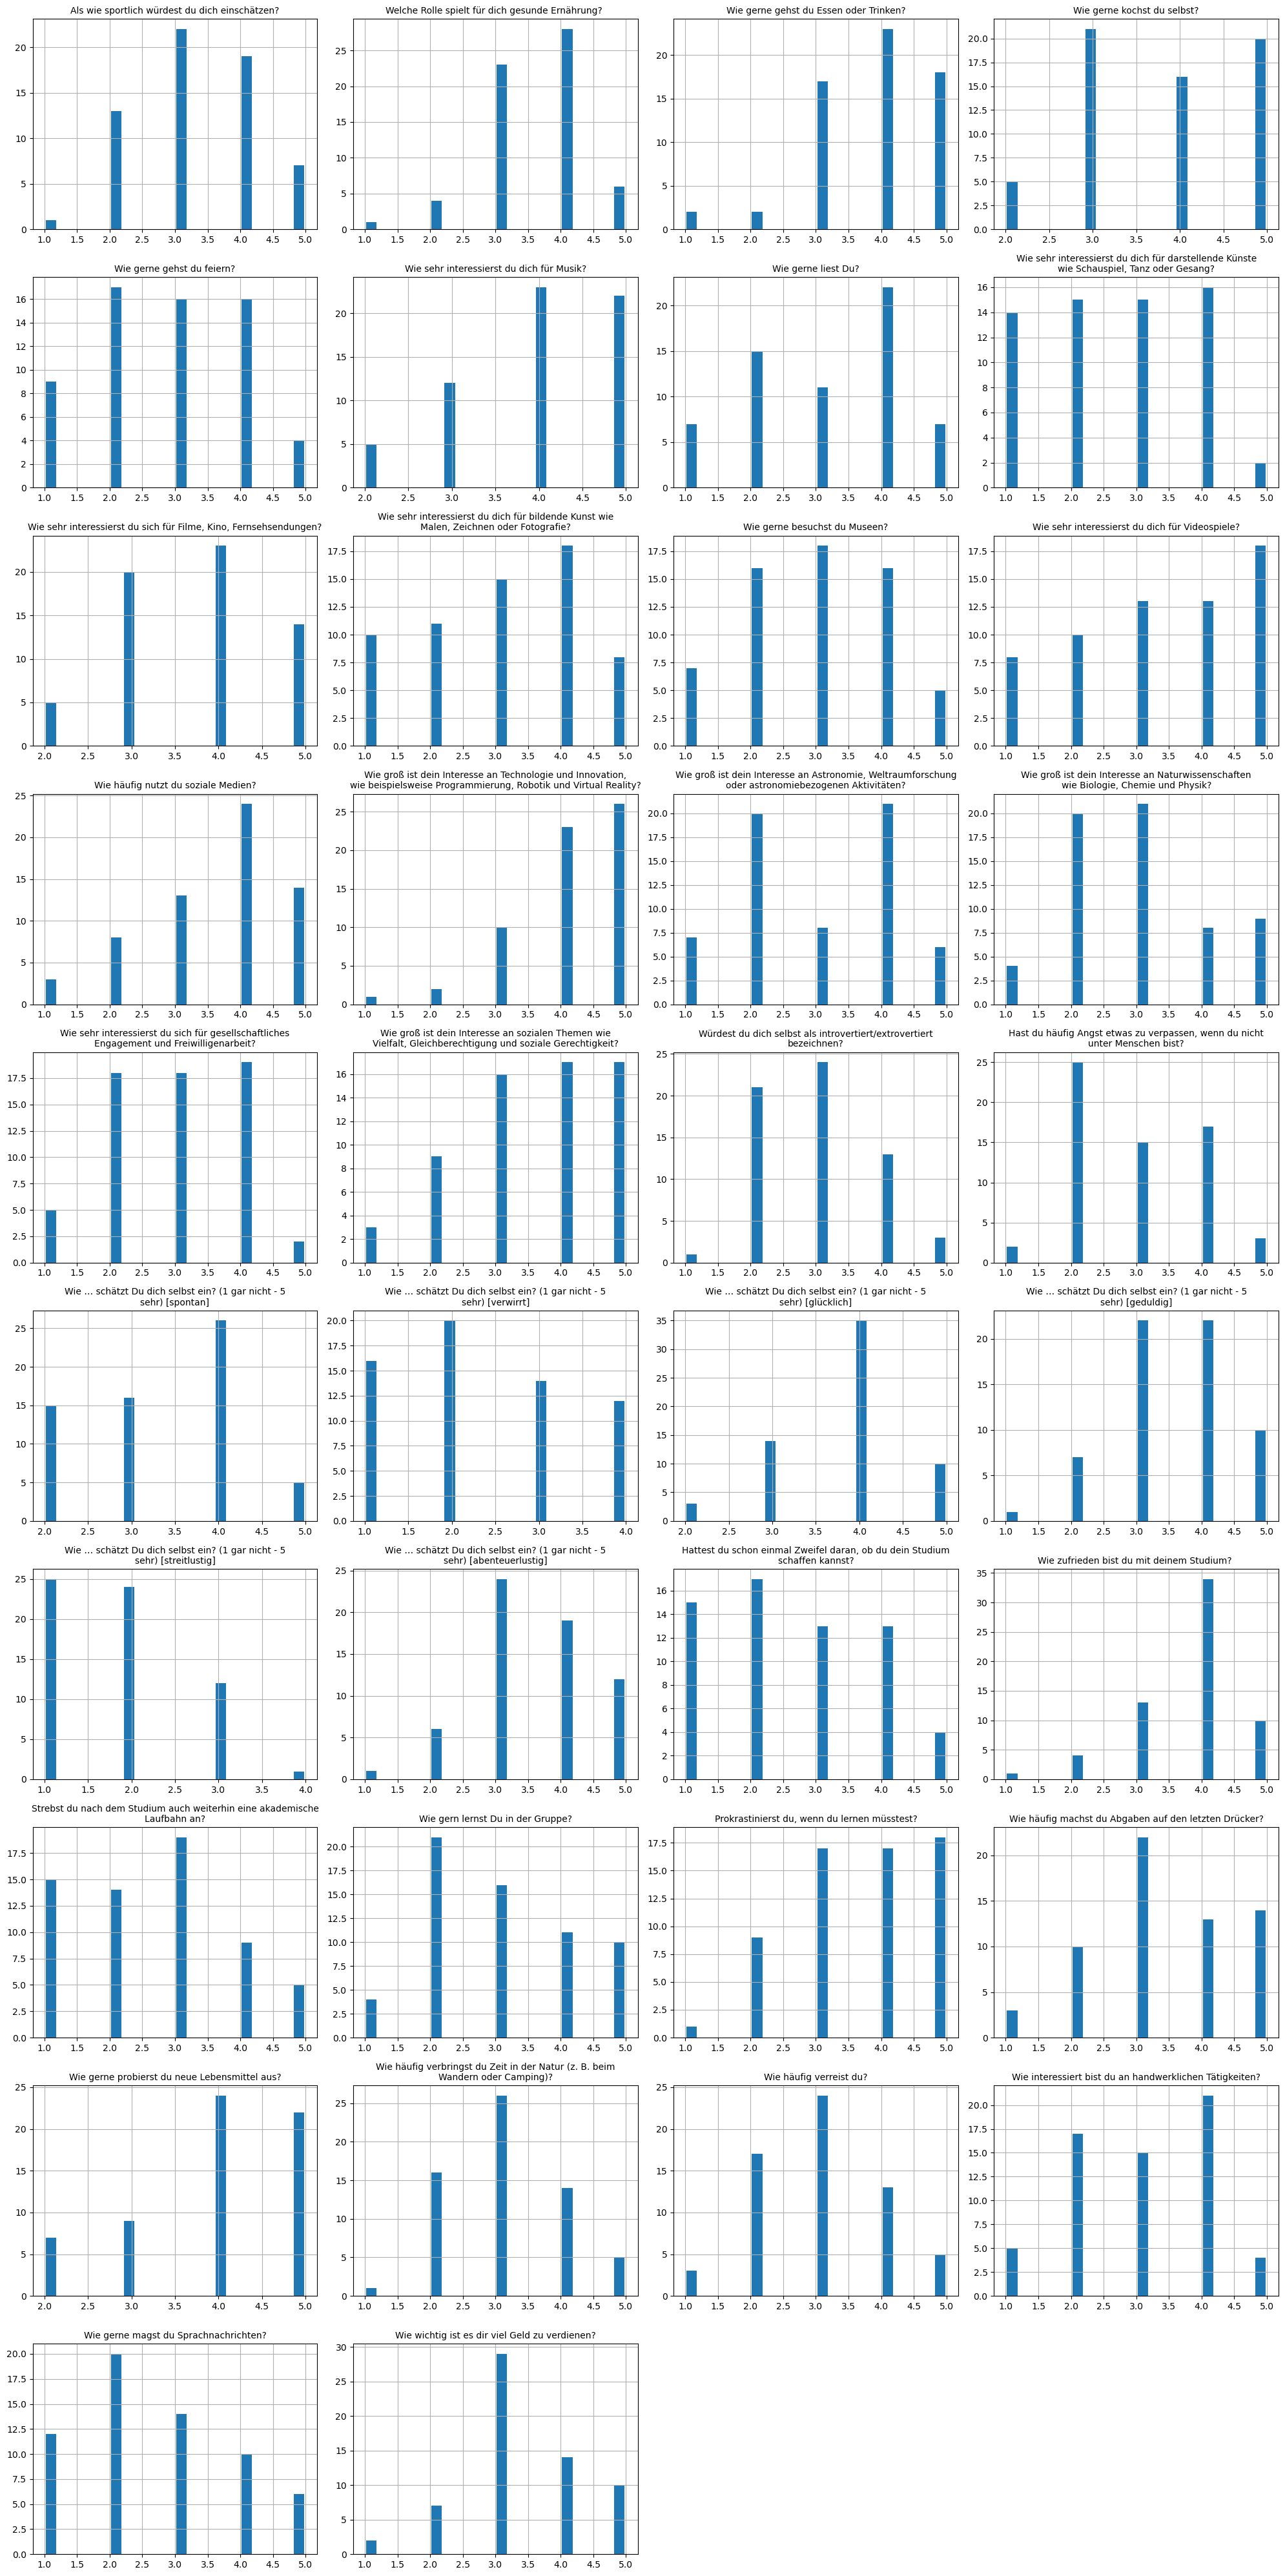

In [140]:
# Plot all numeric columns (including the ordinal data (1-5)) but excluding one-hot-encoded columns and age in a histogram
columns_to_drop = encoded_columns.columns.to_list() + [columns.alter]
data_without_one_hot_encoded_columns_and_age = data.drop(columns_to_drop, axis=1)

data_without_one_hot_encoded_columns_and_age.hist(figsize=(20,40), rwidth=0.8, bins=20, layout=(10, 4))
plt.tight_layout()

### Kategorische Features ###

In [141]:
non_numeric_colums = data.select_dtypes(exclude=["number"])
non_numeric_colums.describe()

,Geschlecht,Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?,Welchem Studiengang fühlst du dich am meisten zugehörig?,Was ist deine absolute Lieblingssportart?,Was ist dein Lieblingsessen? (nur eines angeben),Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)
count,62,62,62,62,58,55
unique,2,3,4,41,36,51
top,männlich,Student*in,MMI,Fußball,Pizza,Antilopen Gang
freq,44,59,25,10,6,2


In [142]:
non_numeric_colums = non_numeric_colums.drop([columns.geschlecht, columns.studiengang, columns.funktion], axis=1)
non_numeric_colums.head()

,Was ist deine absolute Lieblingssportart?,Was ist dein Lieblingsessen? (nur eines angeben),Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)
0,Joggen,Vegane Lasagne,Kraftklub
1,Fußball,Butterbrot,Red hot Chili peppers
2,-,Lasagne,The 1975
3,Trampolin,Burger,NaN
4,Klettern,Dampfnudeln,NaN


<Axes: title={'center': 'Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)'}>

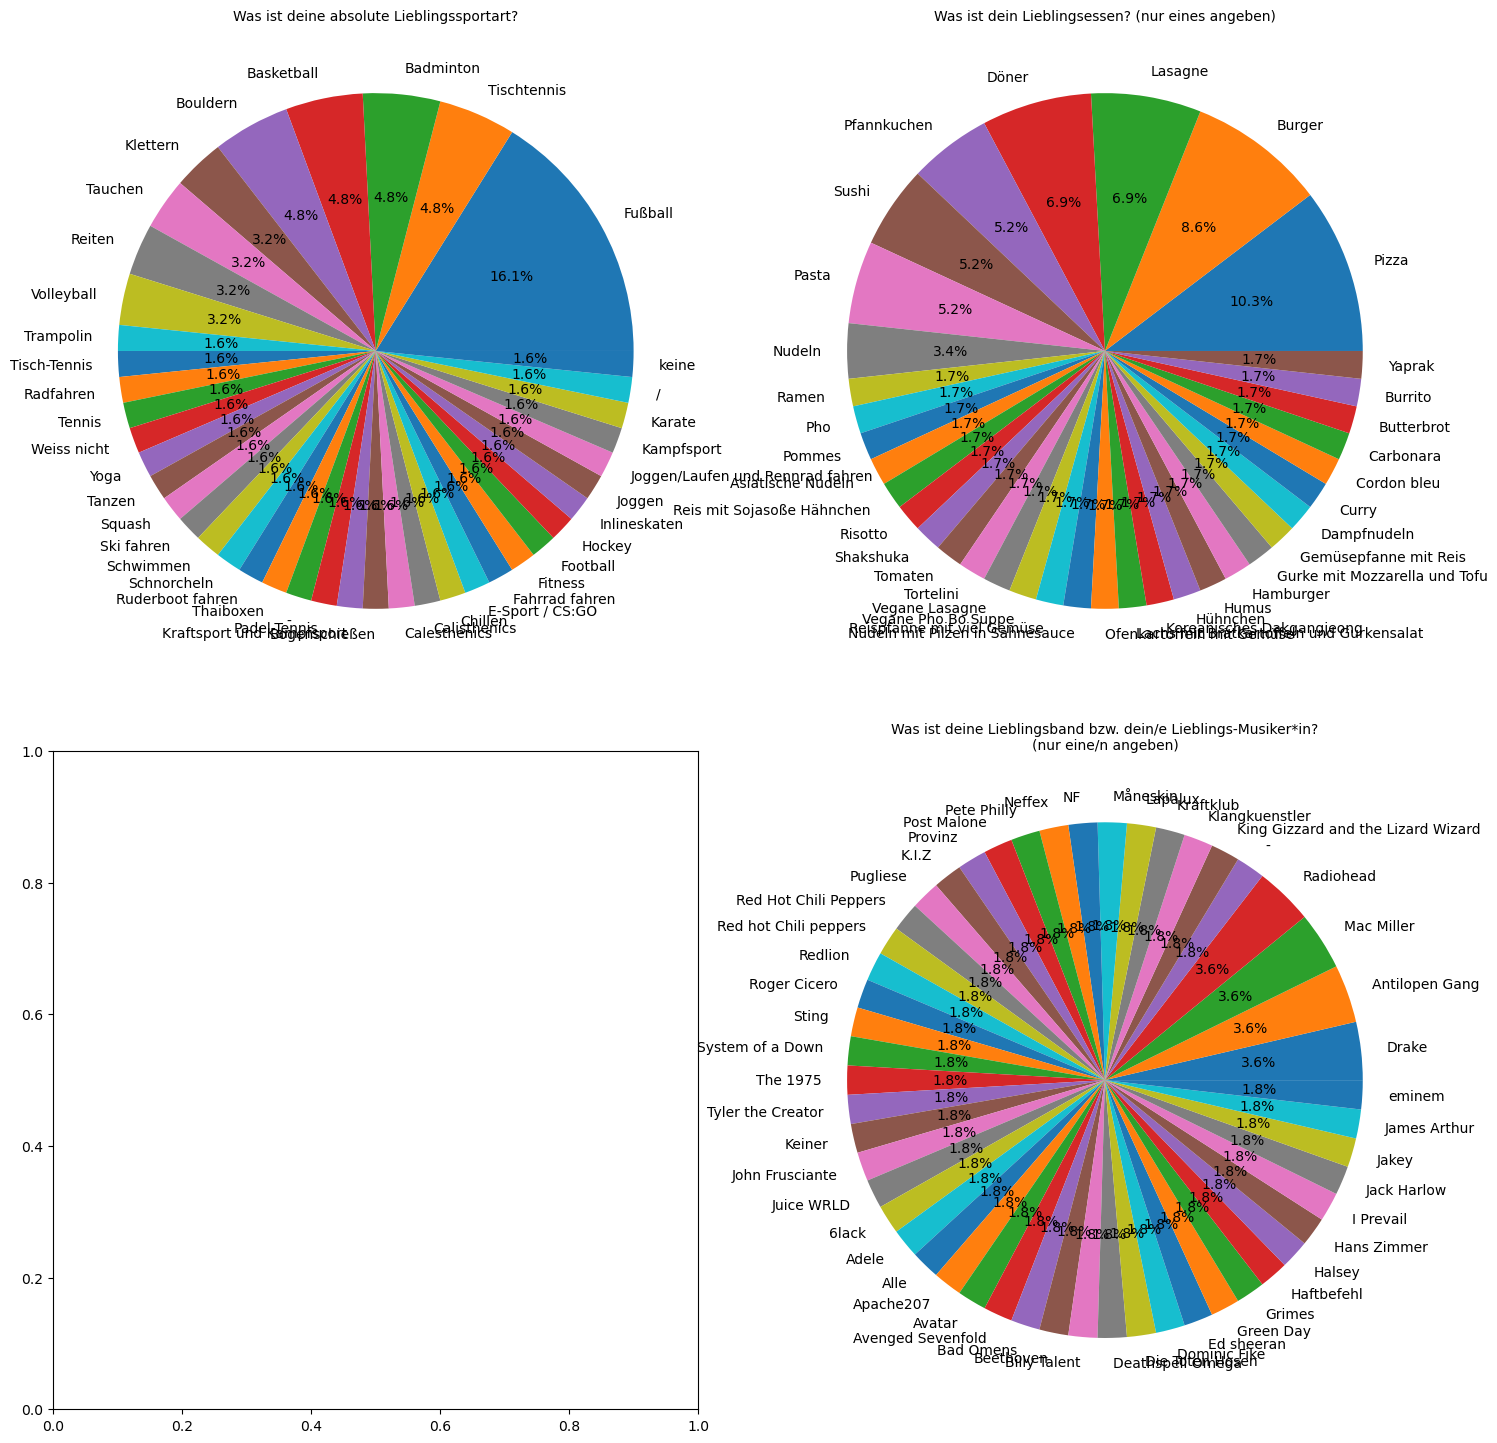

In [143]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout(pad=3)

data.value_counts(columns.lieblingssportart).plot.pie(ax=axes[0, 0], title=columns.lieblingssportart, ylabel="", autopct='%1.1f%%')

data.value_counts(columns.lieblingsessen).plot.pie(ax=axes[0, 1], title=columns.lieblingsessen, ylabel="", autopct='%1.1f%%')

data.value_counts(columns.lieblingsmusiker).plot.pie(ax=axes[1, 1], title=columns.lieblingsmusiker, ylabel="", autopct='%1.1f%%')

# Erkenntnisse und weitere Aufbereitung der Daten #

## Erkenntnisse ##

--> Fußball, Basketball und Calesthenics treten bei den Lieblingssportarten 2x als unterschiedliche Werte aus (z. B. aufgrund von der Schreibweise) (DONE: Bereits zusammengeführt) \

--> Jemand hat bei Lieblingssportart "Weiß nicht" und jemand "-" geantwortet \ (DONE)
--> Außerdem hat jemand "Chillen" geantwortet \ (DONE)
--> Bei Lieblingsmusiker/-band hat auch jemand mit "-" geantwortet (DONE)

--> Tauchen und Schnorcheln könnte man ggf. auch zusammenführen? \
--> Was machen wir mit den Leuten, die zwei oder mehr Sportarten eingegeben haben? \
--> Wollen verschiedene Kampfsportarten zusammenführen?

## Aufbereitung ##

### Lieblingssportart aufbereiten ###

In [144]:
# combine all invalid values into one value
data[columns.lieblingssportart] = data[columns.lieblingssportart].replace(["/", "-", "Weiss nicht", "keine", "Chillen"], "Keine Lieblingssportart")
data[columns.lieblingssportart].fillna("Keine Lieblingssportart", inplace=True)

# only use the first answer if someone selected multiple sports
data[columns.lieblingssportart] = data[columns.lieblingssportart].str.split("/", expand=True)[0]
data[columns.lieblingssportart] = data[columns.lieblingssportart].str.split("und", expand=True)[0]
data[columns.lieblingssportart].value_counts()

# combine "Fahrrad fahren" and "Radfahren" into one value
data[columns.lieblingssportart] = data[columns.lieblingssportart].replace("Fahrrad fahren", "Radfahren")
# combine "Calesthenics" and "Calisthenics" into one category
data[columns.lieblingssportart] = data[columns.lieblingssportart].replace("Calesthenics", "Calisthenics")
# combine "Tischtennis" and "Tisch-Tennis" into one category
data[columns.lieblingssportart] = data[columns.lieblingssportart].replace("Tisch-Tennis", "Tischtennis")

### Lieblingsessen aufbereiten ###

In [145]:
# combine all invalid values into one value
data[columns.lieblingsessen] = data[columns.lieblingsessen].replace(["/", "-", "Weiss nicht", "kein", "keins"], "Kein Lieblingsessen")
data[columns.lieblingsessen].fillna("Kein Lieblingsessen", inplace=True)

# combine "Hamburger" and "Burger" into one category
data[columns.lieblingsessen] = data[columns.lieblingsessen].replace("Hamburger", "Burger")
# combine "Pasta" and "Nudeln" into one category
data[columns.lieblingsessen] = data[columns.lieblingsessen].replace("Nudeln", "Pasta")

### Lieblingsmusiker aufbereiten ###

In [146]:
# combine all invalid values into one value
data[columns.lieblingsmusiker] = data[columns.lieblingsmusiker].replace(["/", "-", "Alle", "Keiner", "keins"], "Kein Lieblingsmusiker")
data[columns.lieblingsmusiker].fillna("Kein Lieblingsmusiker", inplace=True)

# combine "Red Hot Chili Peppers" and "Red hot Chili peppers" into one category
data[columns.lieblingsmusiker] = data[columns.lieblingsmusiker].replace("Red hot Chili peppers", "Red Hot Chili Peppers")

### Aufbereitete Daten plotten ###

<Axes: title={'center': 'Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)'}>

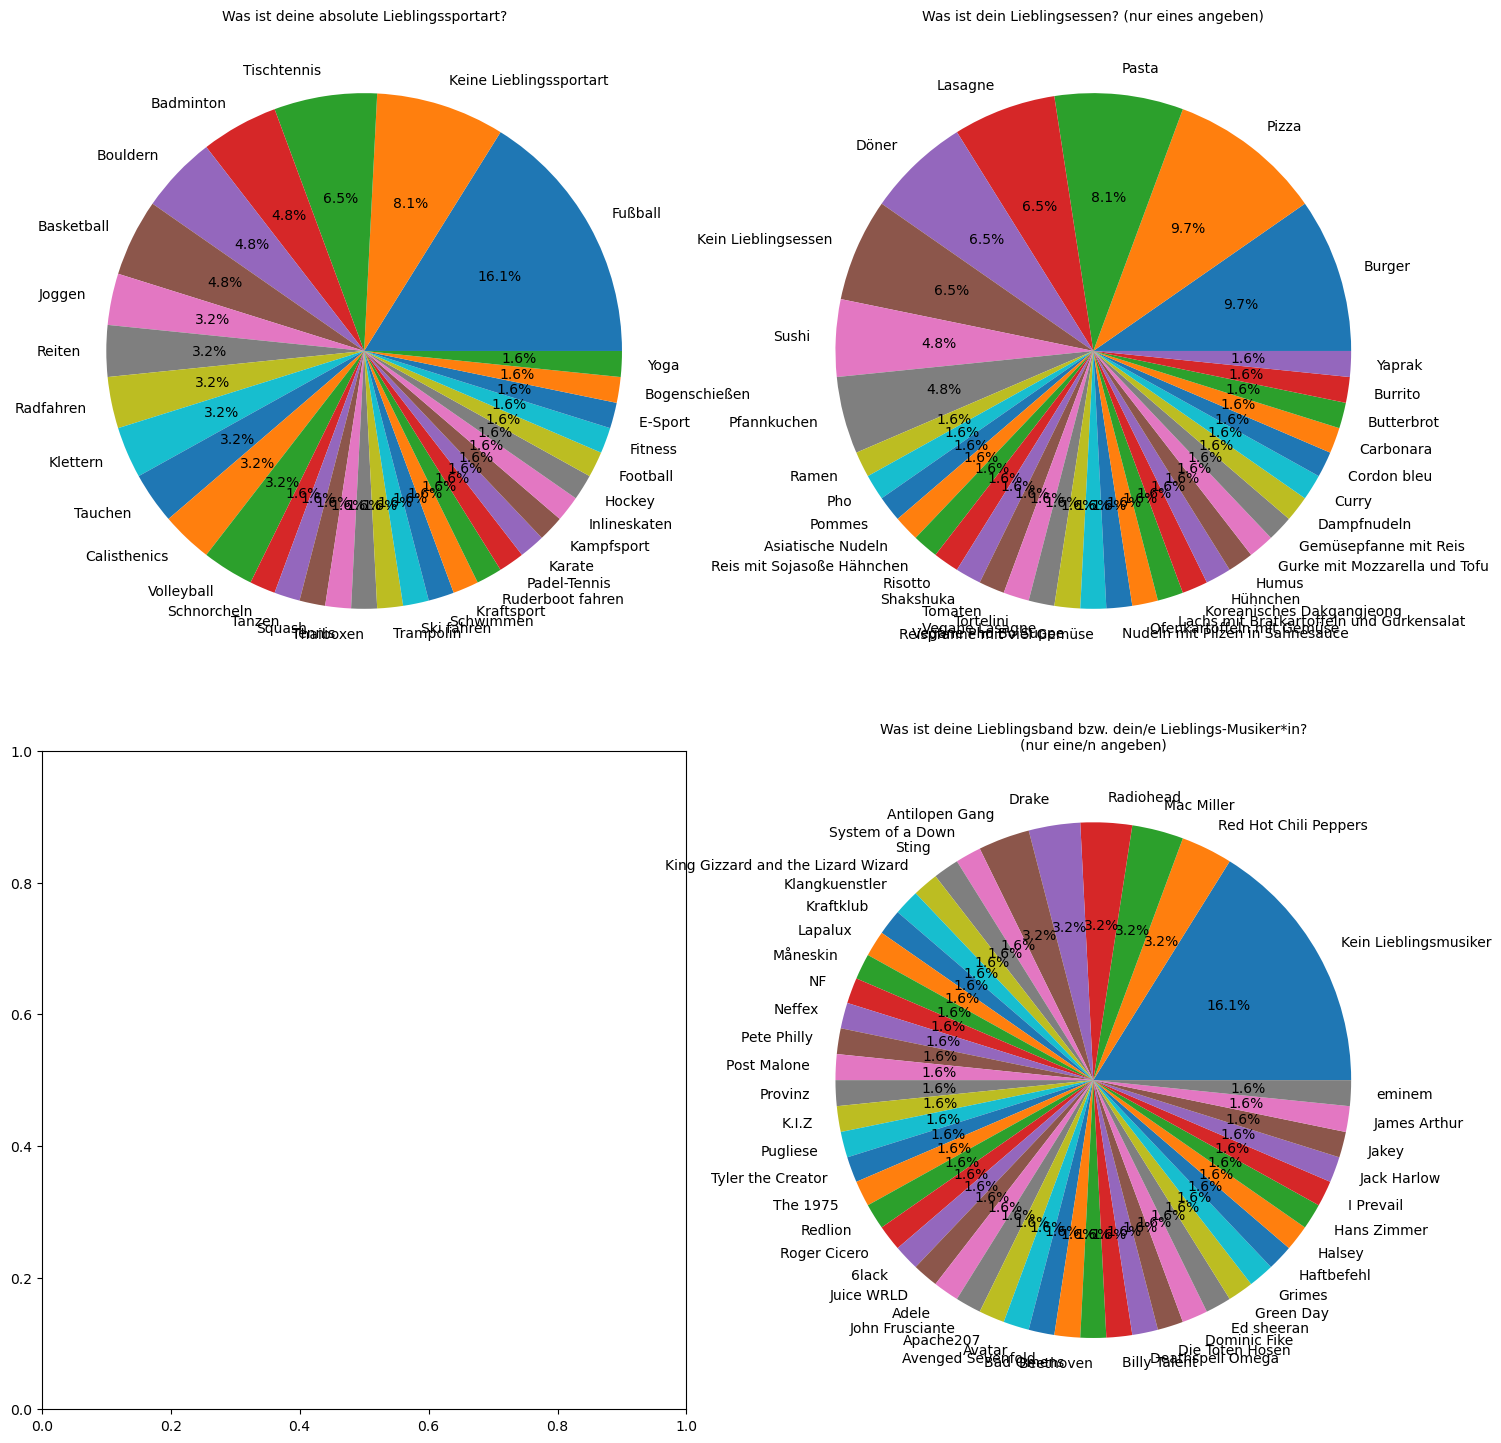

In [147]:
# plot again
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout(pad=3)

data.value_counts(columns.lieblingssportart).plot.pie(ax=axes[0, 0], title=columns.lieblingssportart, ylabel="", autopct='%1.1f%%')

data.value_counts(columns.lieblingsessen).plot.pie(ax=axes[0, 1], title=columns.lieblingsessen, ylabel="", autopct='%1.1f%%')

data.value_counts(columns.lieblingsmusiker).plot.pie(ax=axes[1, 1], title=columns.lieblingsmusiker, ylabel="", autopct='%1.1f%%')

### Aufbereitete Daten speichern ###

In [148]:
# write the cleaned data to a new csv file
data.to_csv("../datasets/data_cleaned.csv", index=False)

%store data
%store columns

Stored 'data' (DataFrame)
Stored 'columns' (Series)


# Encoding & Weiterverarbeitung #

## Lieblingsmusiker mit dem Genre des Musikers ersetzen ##

--> Wie man oben sieht, haben fast alle Befragten unterschiedliche Musiker angegeben \
--> Fast alle Musiker/Bands wurden nur von einer Person angegeben \
--> Daher sind die Daten wenig aussagekräftig \
--> Lösung: Genres der Musiker/Bands herausfinden --> Mehr Überschneidungen

In [149]:
musicians = data[columns.lieblingsmusiker]
genres = []

for musician in musicians:
    if(musician != "Kein Lieblingsmusiker"):
        genre_id = requests.get(f"https://api.deezer.com/search/album?q={musician}").json()["data"][0]["genre_id"]
        if genre_id is not -1:
            genre = requests.get(f"https://api.deezer.com/genre/{genre_id}").json()["name"]
        else:
            genre = "Kein Lieblingsgenre"

        genres.append(genre)
        print(musician, genre)
    else:
        genres.append("Kein Lieblingsgenre") 
        print(musician, "Kein Lieblingsgenre")

<>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Konstantin\AppData\Local\Temp\ipykernel_23496\166417793.py:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if genre_id is not -1:


Kraftklub Rock
Red Hot Chili Peppers Rock
The 1975 Alternative
Kein Lieblingsmusiker Kein Lieblingsgenre
Kein Lieblingsmusiker Kein Lieblingsgenre
Kein Lieblingsmusiker Kein Lieblingsgenre
Pugliese Pop
Green Day Alternative
Pete Philly Rap/Hip Hop
Radiohead Alternative
Dominic Fike Alternative
Redlion Kein Lieblingsgenre
James Arthur Pop
eminem Rap/Hip Hop
Jakey Rap/Hip Hop
Apache207 Rap/Hip Hop
Antilopen Gang Rap/Hip Hop
Drake Rap/Hip Hop
I Prevail Rock
Bad Omens Rock
Provinz Pop
Post Malone Pop
Juice WRLD Rap/Hip Hop
Avenged Sevenfold Rock
Kein Lieblingsmusiker Kein Lieblingsgenre
Klangkuenstler Electro
Lapalux Electro
Jack Harlow Rap/Hip Hop
K.I.Z Rap/Hip Hop
Adele Pop
King Gizzard and the Lizard Wizard Alternative
Drake Rap/Hip Hop
Billy Talent Alternative
Kein Lieblingsmusiker Kein Lieblingsgenre
System of a Down Rock
Sting Pop
Roger Cicero Pop
Kein Lieblingsmusiker Kein Lieblingsgenre
Mac Miller Rap/Hip Hop
Avatar Heavy Metal
Kein Lieblingsmusiker Kein Lieblingsgenre
Måneskin Roc

In [150]:
data, columns = lh.add_column_to_data_and_short_labels(data, columns, "genre_lieblingsmusiker", genres, "Genre des Lieblingsmusikers (encoded)")

data, columns = lh.remove_column_from_data_and_short_labels(data, columns, "lieblingsmusiker")

<Axes: title={'center': 'Genre des Lieblingsmusikers (encoded)'}>

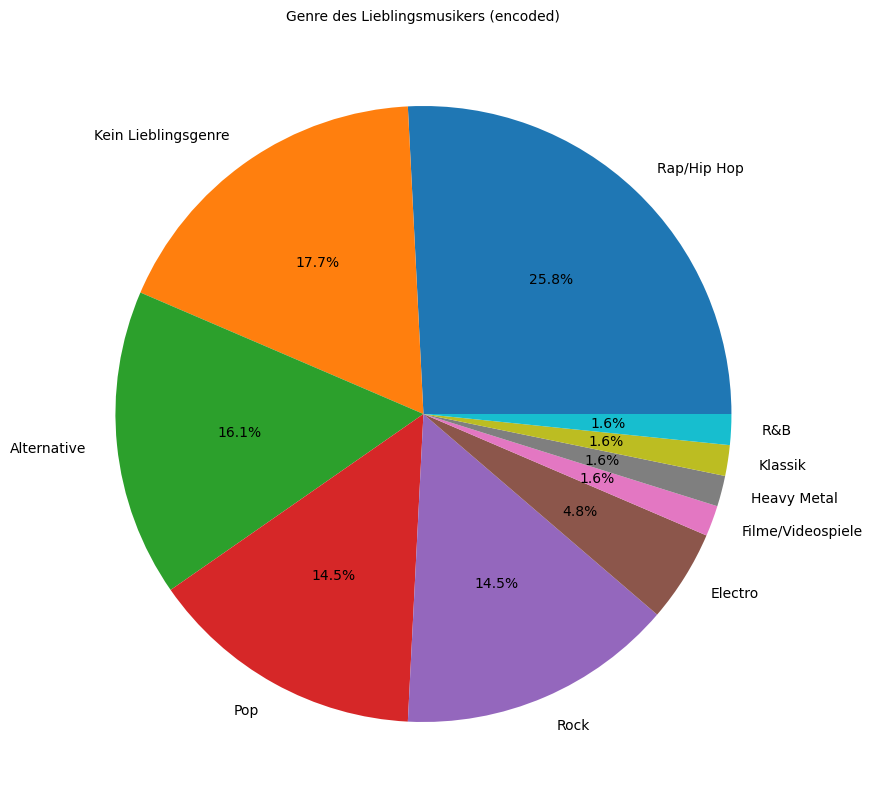

In [151]:
# plot genres
data.value_counts(columns.genre_lieblingsmusiker).plot.pie(title=columns.genre_lieblingsmusiker, ylabel="", autopct='%1.1f%%', figsize=(10, 10))

## "Funktion", "Studiengang", "Lieblingssportart", "Lieblingsessen" und "Genre des Lieblingsmusikers" encoden ##

--> Wahrscheinlich am sinnvollsten mit One Hot Encoding, weil es ja nur eine Nominalskala und keine Ordinalskala ist (also nicht geordnet --> Label Encoding würde eine nicht vorhandene Rangordnung reinbringen, die wir vermeiden wollen)

--> Sollten wir machen, damit z. B. die Korrelationsanalyse auch diese Features mit einbezieht

In [152]:
data_with_genre_encoded, columns_with_genre_encoded = lh.one_hot_encode_columns_and_update_short_labels(
  df=data,
  columns=columns,
  columns_to_encode_short_labels=["lieblingssportart", "lieblingsessen", "studiengang", "funktion"],
)

## "Geschlecht" als numerische Werte ##
--> Niemand hat mit "divers" geantwortet, die Geschlechter können also einfach mit 0 und 1 codiert werden

In [153]:
data_is_female = [sex == 'weiblich' for sex in data_with_genre_encoded[columns.geschlecht]]

data_with_genre_encoded, columns_with_genre_encoded = lh.add_column_to_data_and_short_labels(df=data_with_genre_encoded, all_columns=columns_with_genre_encoded, new_short_label="geschlecht_weiblich", column_df=data_is_female, full_question='Geschlecht (weiblich?)')
data_with_genre_encoded, columns_with_genre_encoded = lh.remove_column_from_data_and_short_labels(df=data_with_genre_encoded, all_columns=columns_with_genre_encoded, column_to_drop_short_label="geschlecht")

In [154]:
data_encoded, columns_encoded = lh.one_hot_encode_columns_and_update_short_labels(
  df=data_with_genre_encoded,
  columns=columns_with_genre_encoded,
  columns_to_encode_short_labels=["genre_lieblingsmusiker"],
)

In [155]:
display(HTML(columns_encoded.to_frame().to_html()))

,0
alter,Alter
sportlichkeit,Als wie sportlich würdest du dich einschätzen?
ernaehrung,Welche Rolle spielt für dich gesunde Ernährung?
essengehen,Wie gerne gehst du Essen oder Trinken?
kochen,Wie gerne kochst du selbst?
feiern,Wie gerne gehst du feiern?
musik,Wie sehr interessierst du dich für Musik?
lesen,Wie gerne liest Du?
schauspiel,"Wie sehr interessierst du dich für darstellende Künste\nwie Schauspiel, Tanz oder Gesang?"
filme,"Wie sehr interessierst du sich für Filme, Kino, Fernsehsendungen?"


### Entfernen von Spalten mit geringer Varianz

Wie bereits in den vorherigen Visualisierung festgestellt, gibt es insbesondere bei der (Multiselect-)Auswahl der Interesse an vorgegebenen Sportarten und den kategorialen Angaben einige Features, die (fast) ausschließlich Datenpunkte mit den Werten "0" enthalten, beispielsweise weil die jeweilige Kategorie nur von einer einzigen Person angegeben wurden. Solche Features erweitern in ihrer Gesamtheit die Dimensionen des Datensets erheblich, ohne zielführende Informationen für die weitere Information zu liefern. Daher soll mithilfe der Varianz als Grenzwert die Anzahl solcher Features von insgesamt 142 verringert werden.

In [156]:
data_encoded.count()

Alter                                               62
Als wie sportlich würdest du dich einschätzen?      62
Welche Rolle spielt für dich gesunde Ernährung?     62
Wie gerne gehst du Essen oder Trinken?              62
Wie gerne kochst du selbst?                         62
                                                    ..
Genre Lieblingsmusiker Klassik? (encoded)           62
Genre Lieblingsmusiker Pop? (encoded)               62
Genre Lieblingsmusiker R&B? (encoded)               62
Genre Lieblingsmusiker Rap Hip Hop? (encoded)       62
Genre Lieblingsmusiker Rock? (encoded)              62
Length: 142, dtype: int64

Bei der Ausgabe der Varianzwerte für jedes Feature ist zu erkennen, dass die Varianz insbesondere bei vielen der aus den Freitextfeldern entstandenen Kategorien sehr niedrig ist. Diese Beobachtung ist auch naheliegend, da hierbei bis auf eine oder ein paar wenige Stellen bei allen Datenpunkten der Wert "0" eingetragen ist, was in der Varianz zu einem auffällig niedrigem Wert führt.

In [157]:
with pd.option_context('display.max_rows', None):
    print(data_encoded.var().sort_values())

Lieblingssportart Ski Fahren? (encoded)                                                                                         0.016129
Lieblingsessen Ofenkartoffeln Mit Gemüse? (encoded)                                                                             0.016129
Lieblingsessen Nudeln Mit Pilzen In Sahnesauce? (encoded)                                                                       0.016129
Lieblingssportart Padel-Tennis? (encoded)                                                                                       0.016129
Lieblingsessen Vegane Pho Bo Suppe? (encoded)                                                                                   0.016129
Lieblingsessen Pommes? (encoded)                                                                                                0.016129
Lieblingssportart Ruderboot Fahren? (encoded)                                                                                   0.016129
Lieblingsessen Carbonara? (encoded)      

Anhand der vorherigen Visualisierungen und der dort zu erkennenden Anzahl von Datenpunkten, die für das jeweilige Feature einen anderen Wert als "0" beinhalten, wird der Grenzwert von 0.02 als angemessen angesehen, um die Anzahl von Features reduzieren zu können, und gleichzeitig keine "ausreichend wichtigen" Features zu entfernen.

In [158]:
selector = VarianceThreshold(threshold = 0.02)
selector.fit_transform(data_encoded)

array([[28,  4,  4, ...,  0,  0,  1],
       [26,  3,  4, ...,  0,  0,  1],
       [24,  2,  5, ...,  0,  0,  0],
       ...,
       [25,  3,  3, ...,  0,  1,  0],
       [31,  3,  4, ...,  1,  0,  0],
       [25,  2,  2, ...,  0,  0,  0]], dtype=int64)

Zur einfacheren Berechnung der zu entfernenden Features wird die Bibliothek "VarianceThreshold" genutzt, die 52 Features erkannt hat, die unterhalb des festgelegten Grenzwertes für die Varianz liegen. Diese werden im Folgenden entfernt.

In [159]:
columns_to_drop = [column for column in columns_encoded if column not in data_encoded.columns[selector.get_support()]]
len(columns_to_drop), columns_to_drop

(52,
 ['Lieblingssportart Bogenschießen? (encoded)',
  'Lieblingssportart E-Sport? (encoded)',
  'Lieblingssportart Fitness? (encoded)',
  'Lieblingssportart Football? (encoded)',
  'Lieblingssportart Hockey? (encoded)',
  'Lieblingssportart Inlineskaten? (encoded)',
  'Lieblingssportart Kampfsport? (encoded)',
  'Lieblingssportart Karate? (encoded)',
  'Lieblingssportart Kraftsport? (encoded)',
  'Lieblingssportart Padel-Tennis? (encoded)',
  'Lieblingssportart Ruderboot Fahren? (encoded)',
  'Lieblingssportart Schnorcheln? (encoded)',
  'Lieblingssportart Schwimmen? (encoded)',
  'Lieblingssportart Ski Fahren? (encoded)',
  'Lieblingssportart Squash? (encoded)',
  'Lieblingssportart Tanzen? (encoded)',
  'Lieblingssportart Tennis? (encoded)',
  'Lieblingssportart Thaiboxen? (encoded)',
  'Lieblingssportart Trampolin? (encoded)',
  'Lieblingssportart Yoga? (encoded)',
  'Lieblingsessen Asiatische Nudeln? (encoded)',
  'Lieblingsessen Burrito? (encoded)',
  'Lieblingsessen Butterbrot? 

Da die Spalten-/Featurenamen während der Berechnung durch kürzere Schlüsselwörter ersetzt werden, müssen die berechneten Spaltennamen zunächst auf die zu entfernenden Schlüsselwörter gemappt werden.

In [160]:
columns_to_drop_encoded = [column_key for column_key in columns_encoded.keys() if (columns_encoded[column_key] in columns_to_drop)]
columns_to_drop_encoded

['lieblingssportart_bogenschießen',
 'lieblingssportart_e-sport',
 'lieblingssportart_fitness',
 'lieblingssportart_football',
 'lieblingssportart_hockey',
 'lieblingssportart_inlineskaten',
 'lieblingssportart_kampfsport',
 'lieblingssportart_karate',
 'lieblingssportart_kraftsport',
 'lieblingssportart_padel-tennis',
 'lieblingssportart_ruderboot_fahren',
 'lieblingssportart_schnorcheln',
 'lieblingssportart_schwimmen',
 'lieblingssportart_ski_fahren',
 'lieblingssportart_squash',
 'lieblingssportart_tanzen',
 'lieblingssportart_tennis',
 'lieblingssportart_thaiboxen',
 'lieblingssportart_trampolin',
 'lieblingssportart_yoga',
 'lieblingsessen_asiatische_nudeln',
 'lieblingsessen_burrito',
 'lieblingsessen_butterbrot',
 'lieblingsessen_carbonara',
 'lieblingsessen_cordon_bleu',
 'lieblingsessen_curry',
 'lieblingsessen_dampfnudeln',
 'lieblingsessen_gemüsepfanne_mit_reis',
 'lieblingsessen_gurke_mit_mozzarella_und_tofu',
 'lieblingsessen_humus',
 'lieblingsessen_hühnchen',
 'liebling

In [161]:
for column_to_drop in columns_to_drop_encoded:
    data_encoded, columns_encoded = lh.remove_column_from_data_and_short_labels(data_encoded, columns_encoded, column_to_drop)

data_encoded.columns, columns_encoded

(Index(['Alter', 'Als wie sportlich würdest du dich einschätzen?',
        'Welche Rolle spielt für dich gesunde Ernährung? ',
        'Wie gerne gehst du Essen oder Trinken?', 'Wie gerne kochst du selbst?',
        'Wie gerne gehst du feiern?',
        'Wie sehr interessierst du dich für Musik?', 'Wie gerne liest Du?',
        'Wie sehr interessierst du dich für darstellende Künste\nwie Schauspiel, Tanz oder Gesang?',
        'Wie sehr interessierst du sich für Filme, Kino, Fernsehsendungen?',
        'Wie sehr interessierst du dich für bildende Kunst wie\nMalen, Zeichnen oder Fotografie?',
        'Wie gerne besuchst du Museen?',
        'Wie sehr interessierst du dich für Videospiele?',
        'Wie häufig nutzt du soziale Medien?',
        'Wie groß ist dein Interesse an Technologie und Innovation,\nwie beispielsweise Programmierung, Robotik und Virtual Reality?',
        'Wie groß ist dein Interesse an Astronomie, Weltraumforschung\noder astronomiebezogenen Aktivitäten?',
        

In [163]:
# write the cleaned data with genre column to a new csv file and the store
data_encoded.to_csv("../datasets/data_cleaned_genre.csv", index=False)

%store data_with_genre_encoded
%store columns_with_genre_encoded

Stored 'data_with_genre_encoded' (DataFrame)
Stored 'columns_with_genre_encoded' (Series)


In [164]:
# write the cleaned and encoded data to a new csv file and the store
data_encoded.to_csv("../datasets/data_cleaned_encoded.csv", index=False)

%store data_encoded
%store columns_encoded

Stored 'data_encoded' (DataFrame)
Stored 'columns_encoded' (Series)
